In [1]:
import pandas as pd
import os
import seaborn
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt
import altair as alt
import numpy as np

alt.data_transformers.disable_max_rows() # allow datasets larger than 100k rows

DataTransformerRegistry.enable('default')

In [ ]:
pb_only = True # SET TO TRUE TO USE ONLY PERSONAL BEST RECORDS

record_df = pd.DataFrame()
if not pb_only:
    # full record dataset
    record_df = pd.read_csv("out/all_records_pt_1.csv", index_col=[0])
    record_df = pd.concat([record_df, pd.read_csv("out/all_records_pt_2.csv", index_col=[0])], ignore_index=True)
else:
    # pb records only
    record_df = pd.read_csv("out/all_pbs.csv", index_col=[0])
    record_df = record_df.reset_index(drop=True)

# full user dataset
user_df = pd.read_csv("out/all_user_info.csv", index_col=[0])
user_df = user_df.reset_index(drop=True)

In [4]:
# construct more attributes
record_df["kps"] = record_df["inputs"] / (record_df["final_time"] / 1000) # keys per second
record_df["kpp"] = record_df["inputs"] / record_df["pieces_placed"] # keys per piece
record_df["percent_perf"] = record_df["finesse_perf"] / record_df["pieces_placed"] # percent of pieces placed with perfect finesse

In [5]:
# calculate time since account creation (users)
def calcTimePlayed(x):
    if x and isinstance(x, str):
        return time.time() - datetime.fromisoformat(x).timestamp()
    else:
        return math.nan
    
user_df["time_played"] = user_df["created_date"].apply(calcTimePlayed) # time since account creation

In [6]:
# drop the three records with over 5k finesse faults
crazy_outliers = record_df.loc[record_df["finesse_faults"] > 5000].index

for crazy_outlier in crazy_outliers:
    record_df = record_df.drop(crazy_outlier)

In [7]:
# perf = record_df.loc[(record_df['percent_perf']==1) & (record_df['datetime'] >= '2024-01-01')]
# perf.sort_values(by='final_time')
# perf.tail()

In [8]:
# # record_df['final_time'] = record_df['final_time'].apply(lambda x: x//1000)
# alt.Chart(record_df.sample(10000)).mark_circle().encode(
#     x = 'datetime:T',
#     y = 'percent_perf:Q',
#     color=alt.Color('final_time:Q', scale=alt.Scale(scheme="turbo"))
# ).interactive()

In [ ]:
# record_df = record_df.loc[record_df['percent_perf'].isnull() == False]
# record_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039456 entries, 0 to 1041090
Data columns (total 20 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   record_id       1039456 non-null  object 
 1   user_id         1039456 non-null  object 
 2   datetime        1039456 non-null  object 
 3   current_pb      1039456 non-null  bool   
 4   once_pb         1039456 non-null  bool   
 5   final_time      1039456 non-null  float64
 6   pps             1039456 non-null  float64
 7   inputs          1039456 non-null  int64  
 8   score           1039456 non-null  int64  
 9   pieces_placed   1039456 non-null  int64  
 10  singles         1039456 non-null  int64  
 11  doubles         1039456 non-null  int64  
 12  triples         1039456 non-null  int64  
 13  quads           1039456 non-null  int64  
 14  all_clears      1039456 non-null  int64  
 15  finesse_faults  1039456 non-null  float64
 16  finesse_perf    1039456 non-null  float64

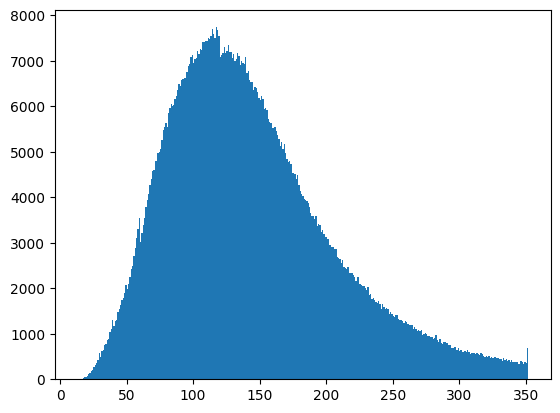

In [24]:
plt.hist(record_df["final_time"].apply(lambda x: x//1000), bins=range(13, 353))
plt.show()

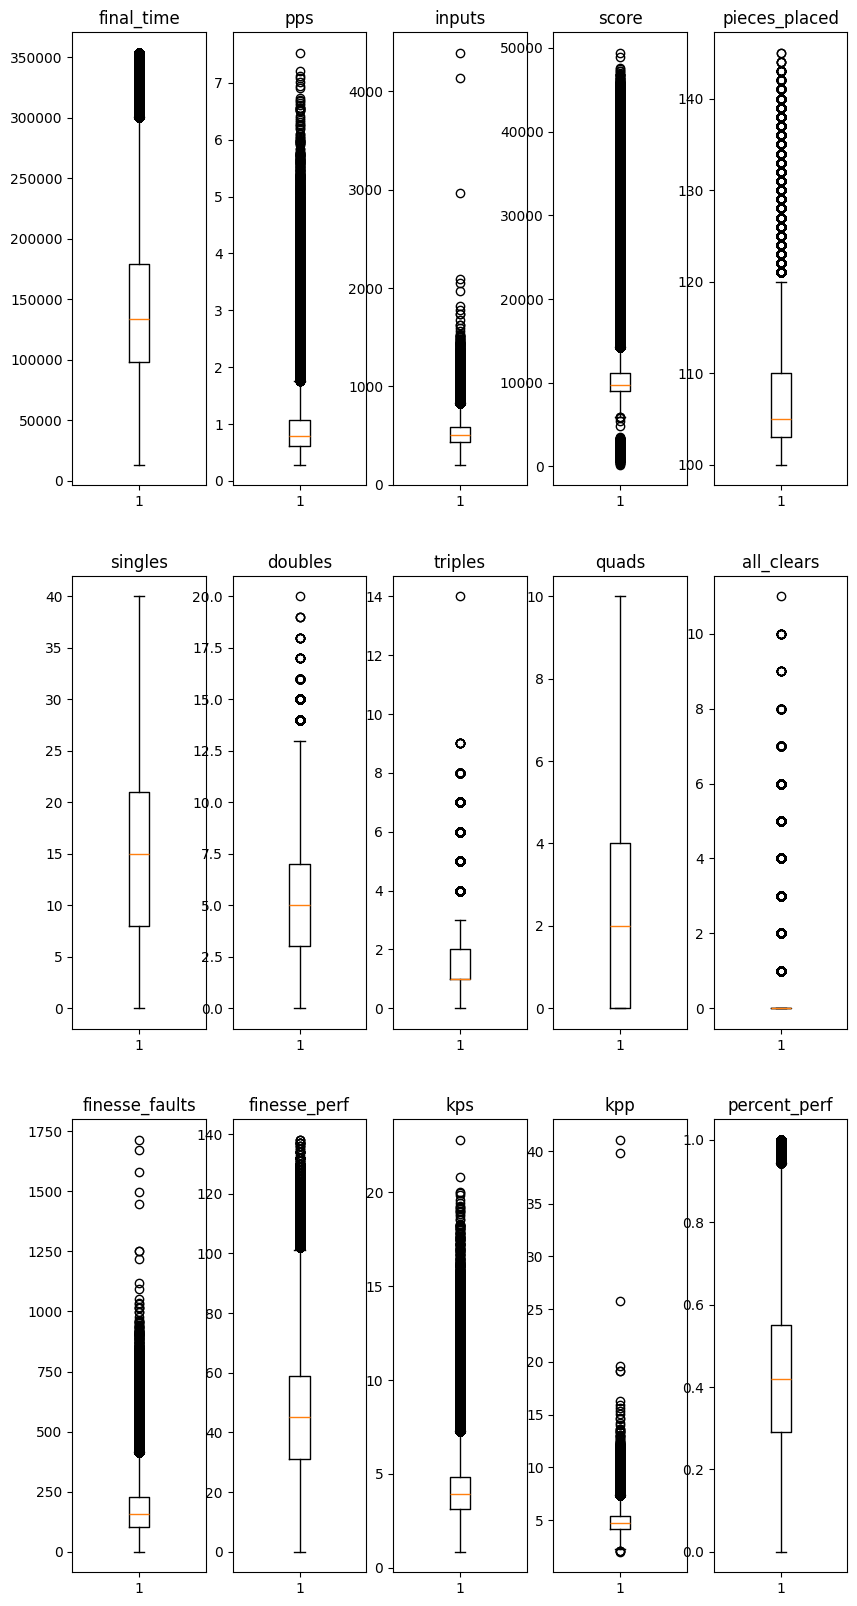

In [25]:
figure, axis = plt.subplots(3, 5, figsize=(10,20))

for i in range(3):
    for j in range(5):
        try:
            axis[i][j].boxplot(record_df.iloc[:,[(i*5)+j+5]].dropna())
            axis[i][j].set_title(record_df.columns[(i*5)+j+5])
        except:
            print("error on i", i, ", j", j, ". Index:", (i*5)+j+5)

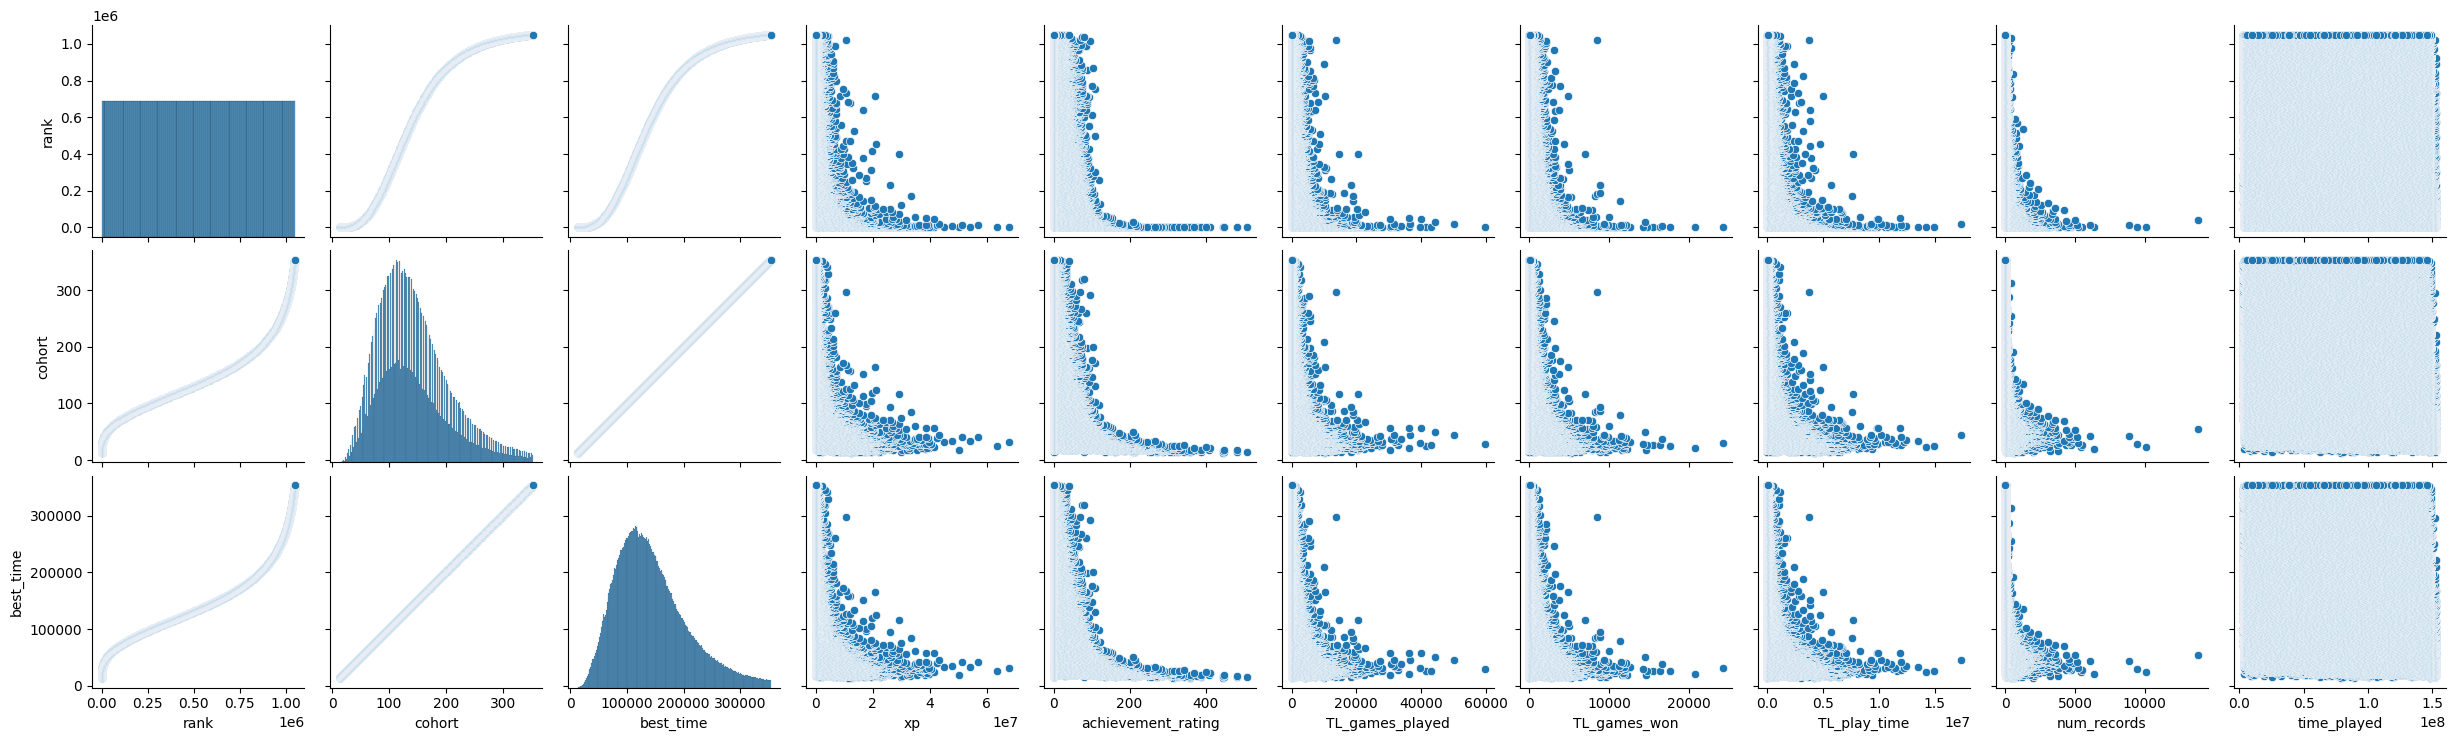

In [26]:
seaborn.pairplot(user_df, y_vars=["rank", "cohort", "best_time"])

[Text(0.5, 1.0, 'Correlation between user attributes')]

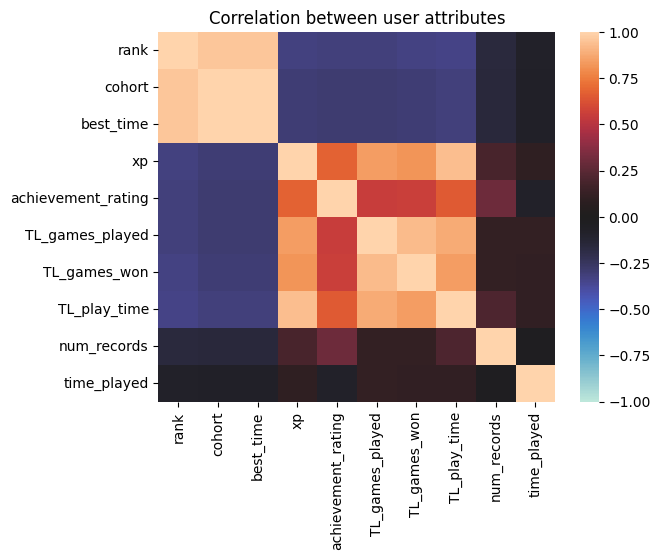

In [27]:
seaborn.heatmap(user_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between user attributes")

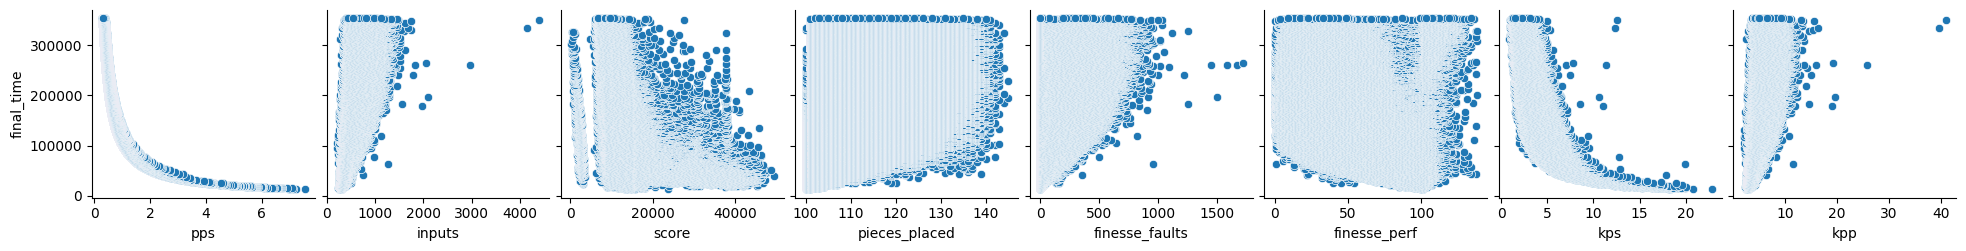

In [28]:
seaborn.pairplot(record_df, y_vars=["final_time"], x_vars=["pps", "inputs", "score", "pieces_placed", "finesse_faults", "finesse_perf", "kps", "kpp"])

[Text(0.5, 1.0, 'Correlation between record attributes')]

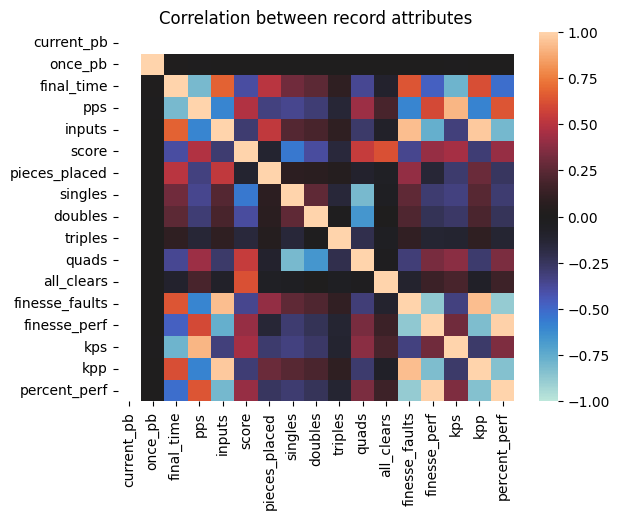

In [29]:
seaborn.heatmap(record_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between record attributes")